In [1]:
using PyPlot
using Roots
using NLsolve
using DataFrames
using IMinuit

In [2]:
include("./src/lattice_data.jl")
include("./src/latt_para.jl")
include("./src/tmat_finite_vol.jl")
include("./src/tmat_finite_vol_nlo.jl")

pole_finite_vol_nlo! (generic function with 1 method)

In [3]:
latt_para = lattice_params()

Dict{Symbol, Any} with 5 entries:
  :m_meson    => (203.655, 486.366)
  :threshold  => [1397.59, 1466.14, 1683.94, 1781.53]
  :decons_vec => [93.1531, 108.23, 119.217, 108.23]
  :L          => 0.0205243
  :mch        => [(203.655, 1193.94), (486.366, 979.777), (551.1, 1132.84), (48…

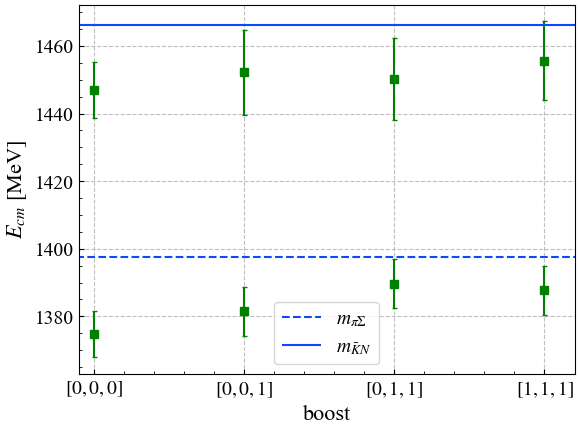

In [4]:
fig, ax = PyPlot.subplots()
plot_latt_ener_2level!(ax, _2lv, _2lv_err, latt_para[:threshold] )
ax.grid()
gcf()

In [5]:
params = copy(latt_para)
f = 1.1999999988821624
fπ = 93

#params[:decons_vec] = [fπ fπ*f; fπ*f fπ]#[92.4, 92.4, 92.4, 92.4] .* 1.2
params[:decons_vec] = [fπ, 108e0]

2-element Vector{Float64}:
  93.0
 108.0

In [6]:
function cost_fun_nlo!(latt_pole, latt_pole_err, params, Nv, b, fitted_para; dof=6)
    a1, a2, d1, d2, d3, d4 = fitted_para
    d = Dict(
        :d1 => d1 * 1e-3,
        :d2 => d2 * 1e-3,
        :d3 => d3 * 1e-3,
        :d4 => d4 * 1e-3
    )
    dd = 0e0
    len = 0e0

    for (pole, pole_err, N) in zip(latt_pole, latt_pole_err, Nv)
        x0 = N == [0, 0, 1] || N == [1, 1, 1] ? bisection_pole_finite_vol_nlo!(params, [a1, a2], b, d, N) : [pole_finite_vol_nlo!(init_x, params, [a1, a2], b, d, N) for init_x in pole]
        dp = (pole - x0) ./ pole_err
        dd += dp' * dp
        len += length(pole)
    end

    return dd / (len - dof)
end
Nv = [[0,0,0], [0,0,1],[0,1,1],[1,1,1]]

function makefit_finite_nlo!(costfun, init_para)
    m = Minuit(costfun, init_para, fix_x1=true)#, fix_x1=true, fix_x0=true)#, limit_x2=(-1, 1), limit_x3=(-1, 1), limit_x4=(-1, 1), limit_x5=(-1, 1))
    m.strategy = 2
    migrad(m)
    migrad(m)
end
cost_fun_nlo!(latt_pole, latt_pole_err, params, Nv, b, [m.values...])

UndefVarError: UndefVarError: `b` not defined

In [7]:
init_para = [-2.0, -2e0, 0.1528504511430132,
-0.26938582503269237,
-0.06559898593888372,
-0.22534174744829905]

b = Dict(
    :b0 => -0.6208300893256031e-3,
    :bD => 0.0603969112334734e-3,
    :bF => -0.3479468364318576e-3
) 
@time m = makefit_finite_nlo!(f -> cost_fun_nlo!(latt_pole, latt_pole_err, params, Nv, b, f), init_para)

The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


The routine was not converged.


In [ ]:
[m.values...]

In [ ]:
[m.errors...]